# Explore here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from functions import get_metrics

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, median_absolute_error

from sklearn.exceptions import ConvergenceWarning


warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [2]:
# Read dataset
#df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")

# Save
#df.to_csv("../data/raw/raw_data.csv")

# Read dataset
df = pd.read_csv("../data/raw/raw_data.csv")

# Drop extra column
df.drop("Unnamed: 0", axis=1, inplace=True)

df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [3]:
df.shape

(3140, 108)

In [4]:
# Check for nulls
df.isnull().sum().sort_values(ascending=False)

fips                                0
Total nurse practitioners (2019)    0
STATE_NAME                          0
COUNTY_NAME                         0
Percent of Population Aged 60+      0
                                   ..
POP_ESTIMATE_2018                   0
% Two or more races                 0
Two or more races pop               0
% Hawaiian/PI-alone                 0
Urban_rural_code                    0
Length: 108, dtype: int64

In [5]:
cols = list(df.columns)

for n in cols:
    print(n)

fips
TOT_POP
0-9
0-9 y/o % of total pop
19-Oct
10-19 y/o % of total pop
20-29
20-29 y/o % of total pop
30-39
30-39 y/o % of total pop
40-49
40-49 y/o % of total pop
50-59
50-59 y/o % of total pop
60-69
60-69 y/o % of total pop
70-79
70-79 y/o % of total pop
80+
80+ y/o % of total pop
White-alone pop
% White-alone
Black-alone pop
% Black-alone
Native American/American Indian-alone pop
% NA/AI-alone
Asian-alone pop
% Asian-alone
Hawaiian/Pacific Islander-alone pop
% Hawaiian/PI-alone
Two or more races pop
% Two or more races
POP_ESTIMATE_2018
N_POP_CHG_2018
GQ_ESTIMATES_2018
R_birth_2018
R_death_2018
R_NATURAL_INC_2018
R_INTERNATIONAL_MIG_2018
R_DOMESTIC_MIG_2018
R_NET_MIG_2018
Less than a high school diploma 2014-18
High school diploma only 2014-18
Some college or associate's degree 2014-18
Bachelor's degree or higher 2014-18
Percent of adults with less than a high school diploma 2014-18
Percent of adults with a high school diploma only 2014-18
Percent of adults completing some college 

It's clean

In [6]:
# Let's drop all the economic and social data since we're predicting health problems

# Rename column
df['10-19'] = df['19-Oct']
df.drop(columns=df.columns[df.columns.str.contains('alone')], inplace=True)
df.drop(columns=df.columns[df.columns.str.contains('race')], inplace=True)
df.drop(columns=df.columns[df.columns.str.contains('Percent')], inplace=True)
df.drop(columns=df.columns[df.columns.str.contains('2018')], inplace=True)
df.drop(columns=df.columns[df.columns.str.contains('2019')], inplace=True)
df.drop(columns=df.columns[df.columns.str.contains('NAME')], inplace=True)
df.drop(columns=df.columns[df.columns.str.contains('diploma')], inplace=True)
df.drop(columns=df.columns[df.columns.str.contains('degree')], inplace=True)
df.drop(columns=df.columns[df.columns.str.contains('pop')], inplace=True)
df.drop(['ICU Beds_x', 'Urban_rural_code', 'TOT_POP', '19-Oct'], axis=1, inplace=True)

df.head()

,fips,0-9,20-29,30-39,40-49,50-59,60-69,70-79,80+,Total Population,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,10-19
0,1001,6787,6878,7089,7582,7738,5826,4050,2014,55036,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,7637
1,1003,24757,23579,25213,27338,29986,29932,20936,9368,203360,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,26913
2,1005,2732,3268,3201,3074,3278,3076,2244,1048,26201,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,2960
3,1007,2456,3029,3113,3038,3115,2545,1723,785,22580,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2596
4,1009,7095,6742,6884,7474,7844,6965,4931,2335,57667,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,7570


In [7]:
df['Heart disease_prevalence']

0        7.9
1        7.8
2       11.0
3        8.6
4        9.2
        ... 
3135     5.9
3136     5.2
3137     7.2
3138     8.2
3139     8.5
Name: Heart disease_prevalence, Length: 3140, dtype: float64

In [8]:
df_encoded = df.copy()

# Normalize numerical features
numerical_features = ['0-9', '10-19','20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+', 'Total Population', 'Population Aged 60+', 'anycondition_number', 'Obesity_number', 'Heart disease_number', 'CKD_number', 'COPD_number']
scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

df_encoded.to_csv('../data/processed/data_processed.csv')

In [9]:
# Define features and target variable
X = df_encoded.drop('anycondition_number', axis=1)
y = df_encoded['anycondition_number']

# Split the scaled data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [11]:
# Evaluate the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

In [12]:
# Display the evaluation metrics
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R-squared: {train_r2}")
print(f"Test R-squared: {test_r2}")

Train RMSE: 0.023267459982253613
Test RMSE: 0.020388626455762737
Train R-squared: 0.9995314766538966
Test R-squared: 0.9988879072503255


In [13]:
get_metrics(y_pred_test, y_test, y_pred_train, y_train)

,R2,Median AE,MAPE
Train set,0.999531,0.005867,8.201443
Test set,0.998888,0.005737,4.096241
Diferencia,-0.000644,-0.000130,-4.105202


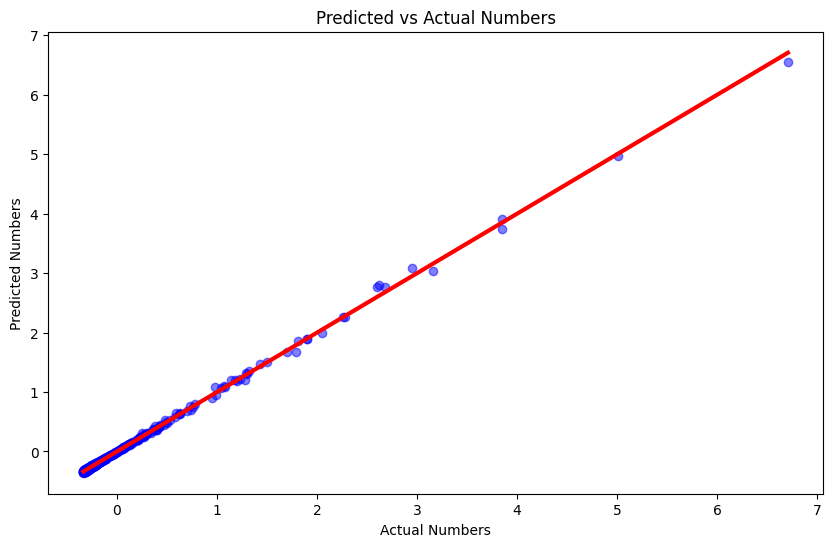

In [14]:
# Plotting predictions vs reality
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=3, color='red')
plt.xlabel('Actual Numbers')
plt.ylabel('Predicted Numbers')
plt.title('Predicted vs Actual Numbers')
plt.show()

In [15]:
# Define features and target variable
X = df_encoded.drop('Heart disease_number', axis=1)
y = df_encoded['Heart disease_number']

# Split the scaled data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [17]:
# Evaluate the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

In [18]:
# Display the evaluation metrics
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R-squared: {train_r2}")
print(f"Test R-squared: {test_r2}")

Train RMSE: 0.03431406024896498
Test RMSE: 0.03350016281318977
Train R-squared: 0.9989840934663228
Test R-squared: 0.9968744901288645


In [19]:
get_metrics(y_pred_test, y_test, y_pred_train, y_train)

,R2,Median AE,MAPE
Train set,0.998984,0.007142,25.282912
Test set,0.996874,0.006991,12.734650
Diferencia,-0.002110,-0.000152,-12.548262


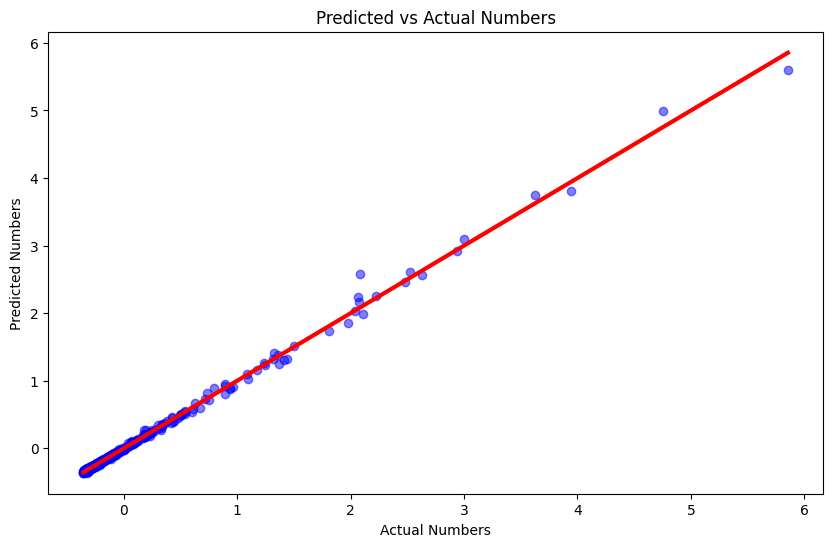

In [20]:
# Plotting predictions vs reality
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=3, color='red')
plt.xlabel('Actual Numbers')
plt.ylabel('Predicted Numbers')
plt.title('Predicted vs Actual Numbers')
plt.show()

In [21]:
# Define features and target variable
X = df_encoded.drop('CKD_prevalence', axis=1)
y = df_encoded['CKD_prevalence']

# Split the scaled data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [23]:
# Evaluate the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

In [24]:
# Display the evaluation metrics
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R-squared: {train_r2}")
print(f"Test R-squared: {test_r2}")

Train RMSE: 0.03485436134354007
Test RMSE: 0.03838423871138655
Train R-squared: 0.9961402661449853
Test R-squared: 0.9958226761516794


In [25]:
get_metrics(y_pred_test, y_test, y_pred_train, y_train)

,R2,Median AE,MAPE
Train set,0.996140,0.026955,0.866098
Test set,0.995823,0.031084,0.925712
Diferencia,-0.000318,0.004130,0.059614


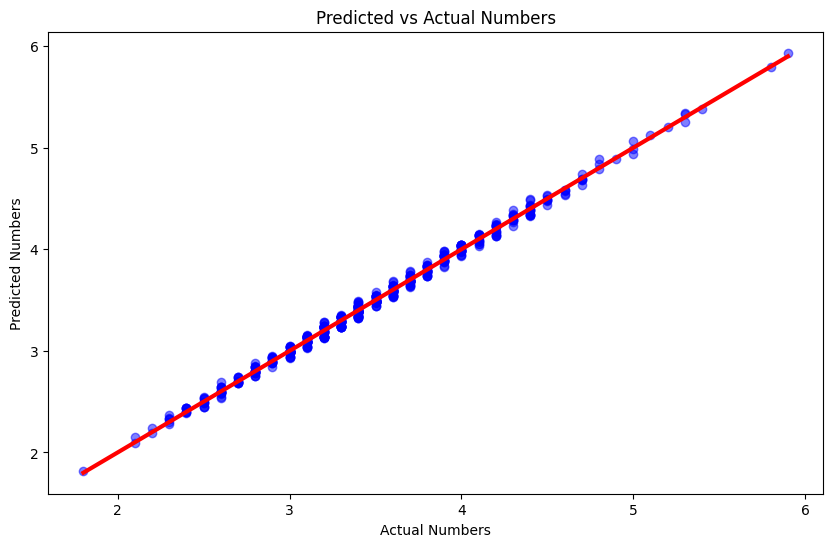

In [26]:
# Plotting predictions vs reality
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=3, color='red')
plt.xlabel('Actual Numbers')
plt.ylabel('Predicted Numbers')
plt.title('Predicted vs Actual Numbers')
plt.show()